In [1]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
M_data = pd.read_pickle("/content/drive/My Drive/Rev_II/Ms_for_SVM_allData.txt")

In [4]:
X = M_data.iloc[:,1:7].to_numpy()
y = M_data.iloc[:,0].to_numpy()


X_motility = M_data.iloc[:,4:7].to_numpy()
y_motility = M_data.iloc[:,0].to_numpy()

X_morph = M_data.iloc[:,1:4].to_numpy()
Y_morph = M_data.iloc[:,0].to_numpy()


X_short = M_data[['ecc','Persis']].to_numpy()
Y_short = M_data.iloc[:,0].to_numpy()

In [5]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

# Define the number of splits (5-fold)
n_splits = 5

# Create StratifiedKFold object
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

for train_ix, test_ix in kfold.split(X, y):
    train_X_both, test_X_both = X[train_ix], X[test_ix]
    train_y_both, test_y_both = y[train_ix], y[test_ix]

    # Apply SMOTE only to the training data in each fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust the parameters as needed
    train_X_both_resampled, train_y_both_resampled = smote.fit_resample(train_X_both, train_y_both)

    unique_labels = np.unique(train_y_both)

    train_counts = [len(train_y_both[train_y_both == label]) for label in np.unique(train_y_both)]
    test_counts = [len(test_y_both[test_y_both == label]) for label in np.unique(test_y_both)]

    print(f'>Train Counts: {train_counts}, Test Counts: {test_counts}')
    print(f'> Train Counts:')
    for label, count in zip(unique_labels, train_counts):
        print(f'    Label {label}: {count}')

    print(f'> Test Counts:')
    for label, count in zip(unique_labels, test_counts):
        print(f'    Label {label}: {count}')

# Example for X_motility, y_motility
for train_ix, test_ix in kfold.split(X_motility, y_motility):
    train_X_mot, test_X_mot = X_motility[train_ix], X_motility[test_ix]
    train_y_mot, test_y_mot = y_motility[train_ix], y_motility[test_ix]

    # Apply SMOTE only to the training data in each fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust the parameters as needed
    train_X_mot_resampled, train_y_mot_resampled = smote.fit_resample(train_X_mot, train_y_mot)

    train_counts = [len(train_y_mot_resampled[train_y_mot_resampled == label]) for label in np.unique(train_y_mot_resampled)]
    test_counts = [len(test_y_mot[test_y_mot == label]) for label in np.unique(test_y_mot)]
    print(f'>Train Counts: {train_counts}, Test Counts: {test_counts}')

# Example for X_morph, Y_morph
for train_ix, test_ix in kfold.split(X_morph, Y_morph):
    train_X_morph, test_X_morph = X_morph[train_ix], X_morph[test_ix]
    train_y_morph, test_y_morph = Y_morph[train_ix], Y_morph[test_ix]

    # Apply SMOTE only to the training data in each fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust the parameters as needed
    train_X_morph_resampled, train_y_morph_resampled = smote.fit_resample(train_X_morph, train_y_morph)


    train_counts = [len(train_y_morph_resampled[train_y_morph_resampled == label]) for label in np.unique(train_y_morph_resampled)]
    test_counts = [len(test_y_morph[test_y_morph == label]) for label in np.unique(test_y_morph)]
    print(f'>Train Counts: {train_counts}, Test Counts: {test_counts}')

>Train Counts: [296, 318, 200], Test Counts: [73, 80, 51]
> Train Counts:
    Label 1.0: 296
    Label 2.0: 318
    Label 3.0: 200
> Test Counts:
    Label 1.0: 73
    Label 2.0: 80
    Label 3.0: 51
>Train Counts: [295, 318, 201], Test Counts: [74, 80, 50]
> Train Counts:
    Label 1.0: 295
    Label 2.0: 318
    Label 3.0: 201
> Test Counts:
    Label 1.0: 74
    Label 2.0: 80
    Label 3.0: 50
>Train Counts: [295, 318, 201], Test Counts: [74, 80, 50]
> Train Counts:
    Label 1.0: 295
    Label 2.0: 318
    Label 3.0: 201
> Test Counts:
    Label 1.0: 74
    Label 2.0: 80
    Label 3.0: 50
>Train Counts: [295, 319, 201], Test Counts: [74, 79, 50]
> Train Counts:
    Label 1.0: 295
    Label 2.0: 319
    Label 3.0: 201
> Test Counts:
    Label 1.0: 74
    Label 2.0: 79
    Label 3.0: 50
>Train Counts: [295, 319, 201], Test Counts: [74, 79, 50]
> Train Counts:
    Label 1.0: 295
    Label 2.0: 319
    Label 3.0: 201
> Test Counts:
    Label 1.0: 74
    Label 2.0: 79
    Label 3.0: 50


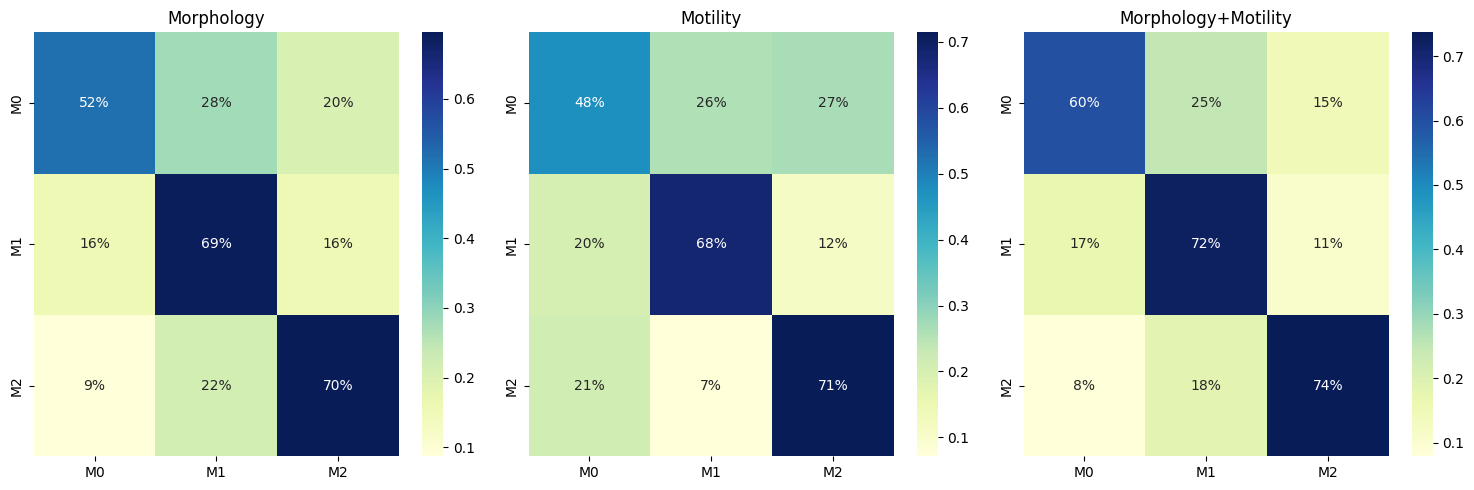

In [14]:
poly = svm.SVC(kernel='poly', degree=5, C=1, gamma='scale').fit(train_X_morph, train_y_morph)
rbf_mot = svm.SVC(kernel='rbf', gamma=60, C=23).fit(train_X_mot, train_y_mot)
poly_both = svm.SVC(kernel='poly', degree=5, C=30, gamma='scale').fit(train_X_both, train_y_both)

# Predictions
poly_pred = poly.predict(test_X_morph)
rbf_pred_mot = rbf_mot.predict(test_X_mot)
poly_pred_both = poly_both.predict(test_X_both)

# Accuracy and F1 scores
poly_accuracy = accuracy_score(test_y_morph, poly_pred)
poly_f1 = f1_score(test_y_morph, poly_pred, average='weighted')
rbf_accuracy_mot = accuracy_score(test_y_mot, rbf_pred_mot)
rbf_f1_mot = f1_score(test_y_mot, rbf_pred_mot, average='weighted')
poly_accuracy_both = accuracy_score(test_y_both, poly_pred_both)
poly_f1_both = f1_score(test_y_both, poly_pred_both, average='weighted')

# Confusion Matrices
cm = confusion_matrix(poly_pred, test_y_morph, normalize='true')
cm_mot = confusion_matrix(rbf_pred_mot, test_y_mot, normalize='true')
cm_both = confusion_matrix(poly_pred_both, test_y_both, normalize='true')

# Plot subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Morphology
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='.0%', xticklabels=['M0', 'M1', 'M2'], yticklabels=['M0', 'M1', 'M2'], ax=axes[0])
axes[0].set_title("Morphology")

# Plot 2: Motility
sns.heatmap(cm_mot, annot=True, cmap="YlGnBu", fmt='.0%', xticklabels=['M0', 'M1', 'M2'], yticklabels=['M0', 'M1', 'M2'], ax=axes[1])
axes[1].set_title("Motility")

# Plot 3: Morphology+Motility
sns.heatmap(cm_both, annot=True, cmap="YlGnBu", fmt='.0%', xticklabels=['M0', 'M1', 'M2'], yticklabels=['M0', 'M1', 'M2'], ax=axes[2])
axes[2].set_title("Morphology+Motility")

plt.tight_layout()
plt.show()